In [3]:
%matplotlib inline

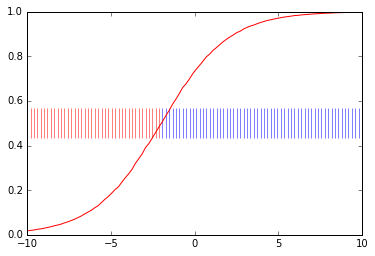

In [118]:
'''Implementation of logistic regression with numpy'''

import numpy as np
import matplotlib.pyplot as plt

# We generate 20 points
x = np.linspace(-10, 10, 100)
eps = np.random.normal(scale=0.01, size=x.shape)

beta = np.array([1.0, 0.5])
linear = beta[0] + beta[1] * x + eps
p_y = np.exp(linear) / (1 + np.exp(linear))
y = p_y > 0.5

plt.plot(x[y], y[y] - 0.5, '|', markersize=30.0)
plt.plot(x[~y], y[~y] + 0.5, '|', color='r', markersize=30.0)
plt.plot(x, p_y, color='r', markersize=30.0)
plt.show()
y = y.astype(float)

In [161]:
'''We want to determine the best logstic model that represents
this dataset and we can do with logistic regression'''

def log_likelihood(x, y, beta):
    linear = beta[0] + beta[1] * x
    p = np.exp(linear) / (1 + np.exp(linear))
    
    lik = y * linear - np.log1p(np.exp(linear))
    return lik.sum()

# Likelihood gradient for logistic regression
def calc_gradient(x, y, beta):
    linear = beta[0] + beta[1] * x
    p = np.exp(linear)/(1 + np.exp(linear))
    grad = np.array([np.dot(y - p, np.ones_like(x)), np.dot(y - p, x)])
    grad = np.array([0.0, np.dot(y - p, x)])
    return grad

beta_est = np.array([1.0, 0.01])
alpha = 0.01
niter = 800

for i in range(niter):
    grad = calc_gradient(x, y, beta_est)
    beta_est += alpha * grad

print(beta_est, log_likelihood(x, y, beta_est))


(array([ 1.        ,  1.02540559]), -10.702893592927904)


In [150]:

def grad_check(x, y, beta):
    eps = 0.0001
    grad_0 = (log_likelihood(x, y, [beta[0] + eps, beta[1]]) - 
                  log_likelihood(x, y, [beta[0], beta[1]])) / eps
    grad_1 = (log_likelihood(x, y, [beta[0], beta[1] + eps]) - 
              log_likelihood(x, y, [beta[0], beta[1]])) / eps
    return np.array([grad_0, grad_1])

In [148]:
grad_check(x, y, [1.0, 1.0]), calc_gradient(x, y, [1.0, 1.0])

([5.0502291474963101, 0.51682388878759866], array([ 5.05047662,  0.51788164]))

1.02010050251


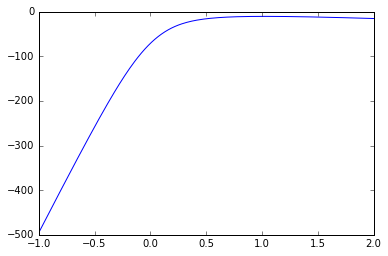

In [101]:
betas = np.linspace(-1, 2, 200)
likelihoods = np.array([log_likelihood(x, y, [1.0, b]) for b in betas])
plt.plot(betas, likelihoods)
print(betas[np.argmax(likelihoods)])